In [ ]:
from scipy.io import loadmat
import numpy as np 
import pandas as pd 
#Importing data from the mat files
mnist_train_data = loadmat('/content/drive/MyDrive/sample/train_32x32.mat')
mnist_test_data =  loadmat('/content/drive/MyDrive/sample/test_32x32.mat')
#Splitting the imported data into training samples, training labels, testing samples and testing labels
trX = mnist_train_data['X']
trY = mnist_train_data['y']
tsX = mnist_test_data['X']
tsY = mnist_test_data['y']

In [ ]:
#Converting the datatype of the attributes in the training and testing dataset into float32
trX = trX.astype('float32')
tsX = tsX.astype('float32')

In [ ]:
#Normalizing the values of the pixels of the images between 0 & 1 by dividing the pixel values by 255
trX=trX/255
tsX=tsX/255

In [ ]:
from keras.utils import to_categorical
#One hot encoding the training and testing labels
trY_onehot = to_categorical(trY)
tsY_onehot = to_categorical(tsY)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
#Building the CNN Architecture
#Initializing the 'model' variable with the sequential model
model=Sequential()
'''Adding the first convolutional layer with 64 output feature maps, kernal with size of 5, padding as 'same', stride as 1
and activation function "ReLu"''' 
model.add(Conv2D(64,(5,5),input_shape=(32,32,3),padding='same',activation='relu',strides=(1,1)))
#Adding the first max pooling layer with pool size (2,2) and with stride as 2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
'''Adding the second convolutional layer with 64 output feature maps, kernal with size of 5, padding as 'same', stride as 1
and activation function "ReLu"''' 
model.add(Conv2D(64,(5,5),input_shape=(32,32,3),padding='same',activation='relu',strides=(1,1)))
#Adding the second max pooling layer with pool size (2,2) and with stride as 2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
'''Adding the third convolutional layer with 128 output feature maps, kernal with size of 5, padding as 'same', stride as 1
and activation function "ReLu"''' 
model.add(Conv2D(128,(5,5),input_shape=(32,32,3),padding='same',activation='relu',strides=(1,1)))
model.add(Flatten())
#Adding the first fully connected layer with 3072 nodes and along with activation function "ReLu"
model.add(Dense(3072,activation='relu'))
#Adding the second fully connected layer with 2048 nodes and along with activation function "ReLu"
model.add(Dense(2048,activation='relu'))
#Adding the last fully connected layer with 10 output nodes which represents 10 classes along with activation function "Softmax"
model.add(Dense(10,activation='softmax'))
'''Using Stochastic Gradient Descent(SGD) as optimizer with learning rate of 0.01 and loss as categorical cross entropy along
with 'accuracy' as metrics'''
opt = SGD(lr=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the above built model with the training data and validating the model against the 30% of the training data
output = model.fit(trX,trY_onehot,batch_size=32,epochs=20,validation_split=0.3)
#Evaluating the trained model with the test data
model.evaluate(tsX,tsY_onehot)

Epoch 1/20
1603/1603 [==============================] - 48s 10ms/step - loss: 2.2299 - accuracy: 0.1934 - val_loss: 1.6619 - val_accuracy: 0.4682
Epoch 2/20
1603/1603 [==============================] - 15s 9ms/step - loss: 1.1902 - accuracy: 0.6233 - val_loss: 0.6456 - val_accuracy: 0.8030
Epoch 3/20
1603/1603 [==============================] - 15s 10ms/step - loss: 0.5504 - accuracy: 0.8387 - val_loss: 0.5235 - val_accuracy: 0.8434
Epoch 4/20
1603/1603 [==============================] - 15s 10ms/step - loss: 0.4253 - accuracy: 0.8753 - val_loss: 0.4793 - val_accuracy: 0.8604
Epoch 5/20
1603/1603 [==============================] - 15s 10ms/step - loss: 0.3553 - accuracy: 0.8950 - val_loss: 0.3883 - val_accuracy: 0.8843
Epoch 6/20
1603/1603 [==============================] - 15s 10ms/step - loss: 0.2947 - accuracy: 0.9126 - val_loss: 0.3622 - val_accuracy: 0.8962
Epoch 7/20
1603/1603 [==============================] - 16s 10ms/step - loss: 0.2514 - accuracy: 0.9271 - val_loss: 0.3758 - 

[0.5913451910018921, 0.9024277925491333]

In [ ]:
#Printing the Accuracy & Loss of Testing Data in Case 1
test_loss,test_accuracy = model.evaluate(tsX,tsY_onehot)
print("Accuracy & Loss of Testing Data in Case 1 : Testing Accuracy = %f ;  Testing Loss = %f" % (test_accuracy,test_loss))

814/814 [==============================] - 3s 4ms/step - loss: 0.5913 - accuracy: 0.9024
Accuracy & Loss of Testing Data in Case 1 : Testing Accuracy = 0.902428 ;  Testing Loss = 0.591345


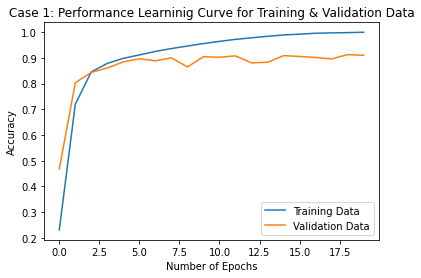

In [ ]:
import matplotlib.pyplot as p
#Plotting the Performance Learning Curve for Case 1
p.plot(output.history['accuracy'])
p.plot(output.history['val_accuracy'])
p.title('Case 1: Performance Learninig Curve for Training & Validation Data')
p.ylabel('Accuracy')
p.xlabel('Number of Epochs')
p.legend(['Training Data', 'Validation Data'], loc='lower right')
p.show()

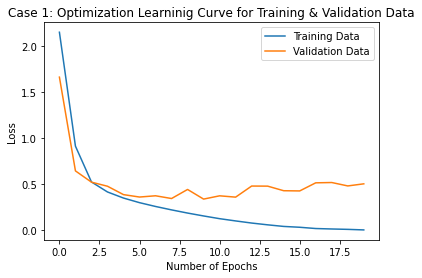

In [ ]:
#Plotting the Optimization Learning Curve for Case 1
p.plot(output.history['loss'])
p.plot(output.history['val_loss'])
p.title('Case 1: Optimization Learninig Curve for Training & Validation Data')
p.ylabel('Loss')
p.xlabel('Number of Epochs')
p.legend(['Training Data', 'Validation Data'], loc='upper right')
p.show()

In [ ]:
#Fitting the above built model with the training data and validating the model against the test data
output_1=model.fit(trX,trY_onehot,epochs=20,batch_size=32,validation_data=(tsX,tsY_onehot))
#Evaluating the trained model with the test data
model.evaluate(tsX,tsY_onehot)

Epoch 1/20
2290/2290 [==============================] - 54s 9ms/step - loss: 2.1804 - accuracy: 0.2124 - val_loss: 1.0281 - val_accuracy: 0.6760
Epoch 2/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.6939 - accuracy: 0.7965 - val_loss: 0.5690 - val_accuracy: 0.8327
Epoch 3/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.4402 - accuracy: 0.8731 - val_loss: 0.4335 - val_accuracy: 0.8733
Epoch 4/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.3473 - accuracy: 0.8990 - val_loss: 0.4071 - val_accuracy: 0.8831
Epoch 5/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.2916 - accuracy: 0.9156 - val_loss: 0.3713 - val_accuracy: 0.8929
Epoch 6/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.2418 - accuracy: 0.9321 - val_loss: 0.4089 - val_accuracy: 0.8815
Epoch 7/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.2047 - accuracy: 0.9427 - val_loss: 0.4330 - val_ac

[0.5985996723175049, 0.9109557271003723]

In [ ]:
#Printing the Accuracy & Loss of Testing Data in Case 2
test_loss,test_accuracy = model.evaluate(tsX,tsY_onehot)
print("Accuracy & Loss of Testing Data in Case 2 : Testing Accuracy = %f ;  Testing Loss = %f" % (test_accuracy,test_loss))

814/814 [==============================] - 3s 4ms/step - loss: 0.5986 - accuracy: 0.9110
Accuracy & Loss of Testing Data in Case 2 : Testing Accuracy = 0.910956 ;  Testing Loss = 0.598600


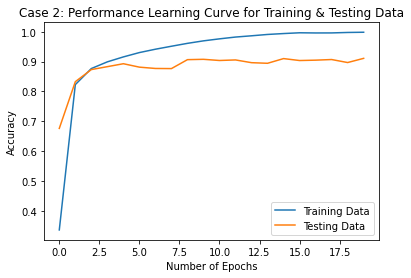

In [ ]:
import matplotlib.pyplot as p
#Plotting the Performance Learning Curve for Case 2
p.plot(output_1.history['accuracy'])
p.plot(output_1.history['val_accuracy'])
p.title('Case 2: Performance Learning Curve for Training & Testing Data')
p.ylabel('Accuracy')
p.xlabel('Number of Epochs')
p.legend(['Training Data', 'Testing Data'], loc='lower right')
p.show()

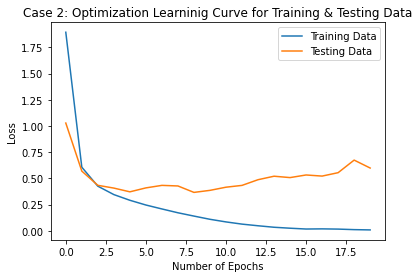

In [ ]:
#Plotting the Optimization Learning Curve for Case 2
p.plot(output_1.history['loss'])
p.plot(output_1.history['val_loss'])
p.title('Case 2: Optimization Learninig Curve for Training & Testing Data')
p.ylabel('Loss')
p.xlabel('Number of Epochs')
p.legend(['Training Data', 'Testing Data'], loc='upper right')
p.show()